Original Data


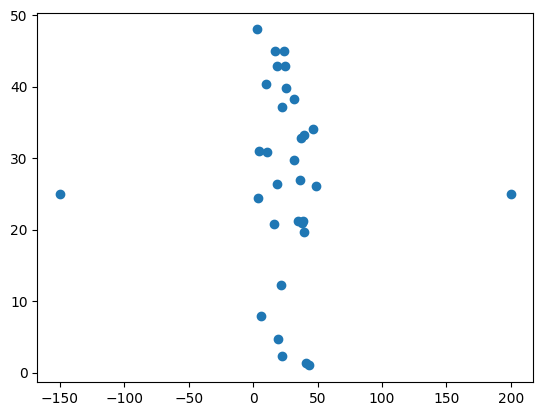

StandardScaler


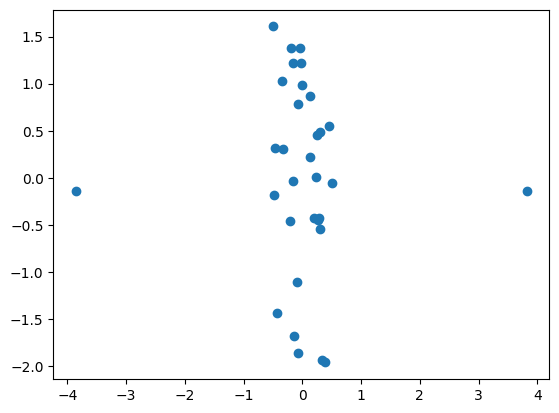

MinMaxSaler


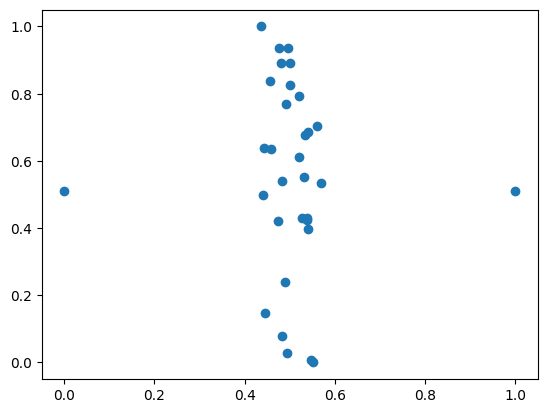

RobustScaler


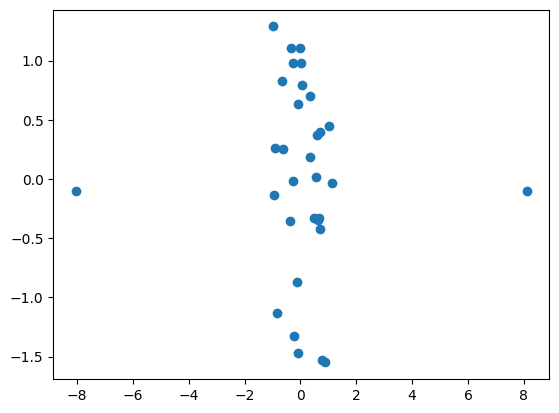

In [4]:
# 必要なライブラリをインポート
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

# ランダムな二次元データを30個作成
np.random.seed(seed=52)
X = np.random.rand(30, 2)*50

# 外れ値を設定
X2 = [[-150,25],[200,25]]
X = np.insert(X, 1, X2, axis=0)

# 縦軸の桁数を大きくする
#X[:,1] = X[:,1]*10000

# 前処理を実行
std=preprocessing.StandardScaler().fit_transform(X)
minmax=preprocessing.MinMaxScaler().fit_transform(X)
robust=preprocessing.RobustScaler().fit_transform(X)

# 散布図を描画する
print("Original Data")
plt.scatter(X[:,0],X[:,1])
plt.show()
print("StandardScaler")
plt.scatter(std[:,0],std[:,1])
plt.show()
print("MinMaxSaler")
plt.scatter(minmax[:,0],minmax[:,1])
plt.show()
print("RobustScaler")
plt.scatter(robust[:,0],robust[:,1])
plt.show()

In [5]:
# 必要なライブラリをインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 乳がんのデータを読み込み、悪性・良性の学習と推論をおこなう。
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)
# ３列目以降を特徴データ
X = df.iloc[:,2:]
# ２列目をラベルデータ
y = df.iloc[:,1]

df.describe()

,0,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# 標準化・正規化
from sklearn import preprocessing
#X=preprocessing.StandardScaler().fit_transform(X)
#X=preprocessing.MinMaxScaler().fit_transform(X)
#X=preprocessing.RobustScaler().fit_transform(X)

In [7]:

# 訓練データ、テストデータ作成
X_train, X_test, y_train, y_test = train_test_split(X, y)

# LinearSVCを適用
from sklearn.svm import LinearSVC
clf = LinearSVC(C=0.1)
clf.fit(X_train,y_train)

# 正答率を求める
print("正答率(学習) = ", clf.score(X_train,y_train))
print("正答率(テスト) = ", clf.score(X_test,y_test))

正答率(学習) =  0.9882629107981221
正答率(テスト) =  0.9790209790209791


In [8]:
from sklearn.model_selection import GridSearchCV
param = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'loss': ['hinge', 'squared_hinge'],
}
grid_search = GridSearchCV(LinearSVC(), param, cv=5)
grid_search.fit(X_train, y_train)

# パラメータ最適化されたモデルを利用する
best = grid_search.best_estimator_
print('正答率(学習) = {:.3f}'.format(best.score(X_train, y_train)))
print('正答率(テスト) = {:.3f}'.format(best.score(X_test, y_test)))
print('最適なパラメータ: {}'.format(grid_search.best_params_))

正答率(学習) = 0.981
正答率(テスト) = 0.979
最適なパラメータ: {'C': 0.01, 'loss': 'hinge'}


/Users/yugo_suzuki/Lecture/MD/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yugo_suzuki/Lecture/MD/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yugo_suzuki/Lecture/MD/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yugo_suzuki/Lecture/MD/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yugo_suzuki/Lecture/MD/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yugo_suzuki/Lecture/MD/